In [31]:
import numpy as np
import pandas as pd
df = np.load('test.npy')

In [30]:
# 디렉토리 변경
cd C:/Users/82102/Datasets/

C:\Users\82102\Datasets


In [4]:
# 300 프레임짜르기  3번째 
df_D = pd.DataFrame(df[:300,3,:])
df_D = df_D.assign(category = "first")
df_D = df_D.set_index(['category'])
df_D.columns= ['x','y','z']

# 300 프레임짜르기  7번째 
df_E = pd.DataFrame(df[:300,7,:])
df_E = df_E.assign(category = "second")
df_E = df_E.set_index(['category'])
df_E.columns= ['x','y','z']

# 300 프레임짜르기  11번째 
df_F = pd.DataFrame(df[:300,11,:])
df_F = df_F.assign(category = "third")
df_F = df_F.set_index(['category'])
df_F.columns= ['x','y','z']

In [7]:
# 엄지의 평균(30프레임)  
a =[]
for i in range(10):
     a.append(df_D[30*i:30*(i+1)].mean())
        
# 검지의 평균(30프레임)         
b =[]
for i in range(10):
     b.append(df_E[30*i:30*(i+1)].mean())

# 중지의 평균(30프레임)
c =[]
for i in range(10):
     c.append(df_F[30*i:30*(i+1)].mean())

In [14]:
# scatterplot 그리기 
import matplotlib.pyplot as plt
%matplotlib inline 
from mpl_toolkits.mplot3d import Axes3D

x = []
y = []
z = []
for i in range(10):
    x.append(a[i][0])
    y.append(a[i][1])
    z.append(a[i][2])
    
x = np.array(x)
y = np.array(y)
z = np.array(z)

x1 = []
y1 = []
z1 = []
for i in range(10):
    x1.append(b[i][0])
    y1.append(b[i][1])
    z1.append(b[i][2])
x1 = np.array(x1)
y1 = np.array(y1)
z1 = np.array(z1)

x2 = []
y2 = []
z2 = []
for i in range(10):
    x2.append(c[i][0])
    y2.append(c[i][1])
    z2.append(c[i][2])
x2 = np.array(x2)
y2 = np.array(y2)
z2 = np.array(z2)

fig = plt.figure(figsize=(3, 3))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, marker='o', s=10, c='blue')
ax.scatter(x1,y1,z1, marker='o', s=10, c='orange')
ax.scatter(x2,y2,z2, marker='o', s=10, c='darkgreen')
plt.show()

In [52]:
# 주희님 데이터 
ju1 = pd.DataFrame([[df[0][3],df[1][3],df[2][3]]], columns=['x','y','z'])
ju2 = pd.DataFrame([[df[0][7],df[1][7],df[2][7]]], columns=['x','y','z'])
ju3 = pd.DataFrame([[df[0][11],df[1][11],df[2][11]]], columns=['x','y','z'])
ju = pd.concat([ju1,ju2,ju3])

In [44]:
da1 = pd.DataFrame([[a[0][0],a[0][1],a[0][2]]], columns=['x','y','z'])
da2 = pd.DataFrame([[b[0][0],b[0][1],b[0][2]]], columns=['x','y','z'])
da3 = pd.DataFrame([[c[0][0],c[0][1],c[0][2]]], columns=['x','y','z'])
da = pd.concat([da1,da2,da3])

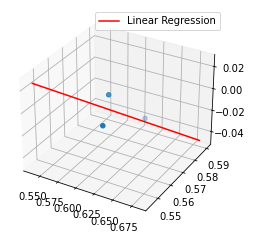

In [65]:
# 다중선형회귀 보간법 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = ju[['x', 'y', 'z']].values
Xlen = X.shape[0]
avgPointCloud = 1 / Xlen * np.array([np.sum(X[:, 0]), np.sum(X[:, 1]), np.sum(X[:, 2])])
Xmean = X - avgPointCloud

cov = 1 / Xlen * X.T.dot(Xmean)

t = np.arange(-300, 300, 1)
linearReg = avgPointCloud + cov[:, 0] * np.vstack(t)

ax.scatter(ju['x'],ju['y'],ju['z'])
ax.plot(linearReg[:, 0], linearReg[:, 1], linearReg[:, 2], 'r', label='Linear Regression')
ax.legend()

plt.show()

In [77]:
linearReg[:,0]

array([0.5373128 , 0.5375558 , 0.53779879, 0.53804178, 0.53828477,
       0.53852777, 0.53877076, 0.53901375, 0.53925674, 0.53949974,
       0.53974273, 0.53998572, 0.54022871, 0.54047171, 0.5407147 ,
       0.54095769, 0.54120068, 0.54144367, 0.54168667, 0.54192966,
       0.54217265, 0.54241564, 0.54265864, 0.54290163, 0.54314462,
       0.54338761, 0.54363061, 0.5438736 , 0.54411659, 0.54435958,
       0.54460258, 0.54484557, 0.54508856, 0.54533155, 0.54557455,
       0.54581754, 0.54606053, 0.54630352, 0.54654652, 0.54678951,
       0.5470325 , 0.54727549, 0.54751849, 0.54776148, 0.54800447,
       0.54824746, 0.54849046, 0.54873345, 0.54897644, 0.54921943,
       0.54946243, 0.54970542, 0.54994841, 0.5501914 , 0.5504344 ,
       0.55067739, 0.55092038, 0.55116337, 0.55140637, 0.55164936,
       0.55189235, 0.55213534, 0.55237834, 0.55262133, 0.55286432,
       0.55310731, 0.5533503 , 0.5535933 , 0.55383629, 0.55407928,
       0.55432227, 0.55456527, 0.55480826, 0.55505125, 0.55529

In [111]:
linearReg[:, 1]

array([0.52547029, 0.53820051, 0.55093073, 0.56366095, 0.57639116,
       0.58912138, 0.6018516 , 0.61458182, 0.62731203, 0.64004225,
       0.65277247, 0.66550269, 0.67823291, 0.69096312, 0.70369334,
       0.71642356, 0.72915378, 0.74188399, 0.75461421, 0.76734443])

In [75]:
# 이미지에 라인 그리기 
import cv2
img = cv2.imread('KakaoTalk_20220810_164747987.jpg')
img = cv2.resize(img,(640,480))

In [76]:
ju_line = cv2.line(img,(640-344,261),(640-436,283),(0,0,255))
#cv2.flip(img,1)
cv2.imshow('Line',img)
cv2.waitKey()
cv2.destroyAllWindows()